Link to Colab\
https://colab.research.google.com/drive/1S0AZDfUvsy_rsmafRyAX9KjsGTmpb-0G

Q2
Initial Data exploration 
1. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

In [ ]:
income94.shape

(32561, 15)

2

In [ ]:
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
income94.isna().any()

age                   False
workclass             False
fnlwgt                False
education             False
education_num         False
marital_status        False
occupation            False
relationship          False
race                  False
sex                   False
capital_gain          False
capital_loss          False
hours_per_week        False
native_country        False
gross_income_group    False
dtype: bool

In [ ]:
income94.age.value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

In [ ]:
income94.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [ ]:
income94.fnlwgt.value_counts()

164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64

In [ ]:
income94.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [ ]:
income94.education_num.value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

In [ ]:
income94.marital_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [ ]:
income94.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
income94.relationship.value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [ ]:
income94.race.value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [ ]:
income94.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [ ]:
income94.capital_gain.value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital_gain, Length: 119, dtype: int64

In [ ]:
income94.capital_loss.value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital_loss, Length: 92, dtype: int64

In [ ]:
income94.hours_per_week.value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: hours_per_week, Length: 94, dtype: int64

In [ ]:
income94.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [ ]:
income94.gross_income_group.value_counts()

 <=50K    24720
 >50K      7841
Name: gross_income_group, dtype: int64

In [ ]:
income94.isnull().sum()

age                   0
workclass             0
fnlwgt                0
education             0
education_num         0
marital_status        0
occupation            0
relationship          0
race                  0
sex                   0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country        0
gross_income_group    0
dtype: int64

In [ ]:
#income94.workclass = income94.workclass.replace(" ?", np.nan) #cast missing values to np.nan for a column

In [ ]:
income94 = income94.replace(" ?", np.nan)

In [ ]:
income94.isnull().sum()

age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64

In [ ]:
income94

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


3. 

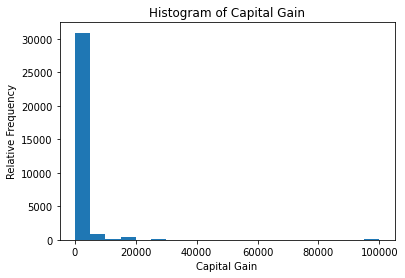

In [ ]:
plt.hist(income94.capital_gain, bins = 20)
plt.title('Histogram of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Relative Frequency')
plt.show()


In [ ]:
len(income94[income94.capital_gain == 0])


29849

In [ ]:
len(income94)

32561

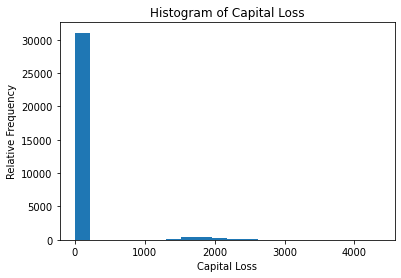

In [ ]:
plt.hist(income94.capital_loss, bins = 20)
plt.title('Histogram of Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Relative Frequency')
plt.show()

In [ ]:
len(income94[income94.capital_loss == 0])

31042

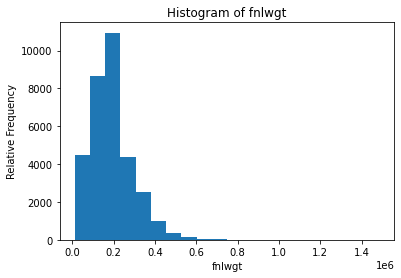

In [ ]:
plt.hist(income94.fnlwgt, bins = 20)
plt.title('Histogram of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Relative Frequency')
plt.show()

4. 

In [ ]:
income94.fnlwgt.describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

In [ ]:
len(income94[income94.sex == " Male"]) + len(income94[income94.sex == " Female"]) 

32561

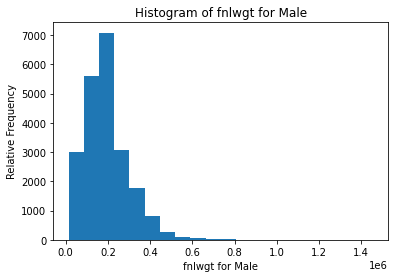

In [ ]:
plt.hist(income94[income94.sex == " Male"].fnlwgt, bins = 20)
plt.title('Histogram of fnlwgt for Male')
plt.xlabel('fnlwgt for Male')
plt.ylabel('Relative Frequency')
plt.show()

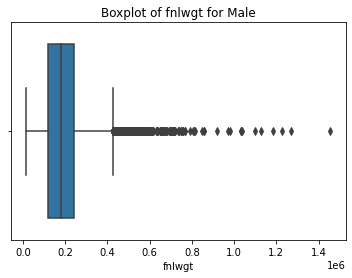

In [ ]:
# Generate boxplot
import seaborn as sns

sns.boxplot(x = 'fnlwgt', data = income94[income94.sex == " Male"])
plt.xlabel('fnlwgt')
plt.title('Boxplot of fnlwgt for Male')
plt.show()

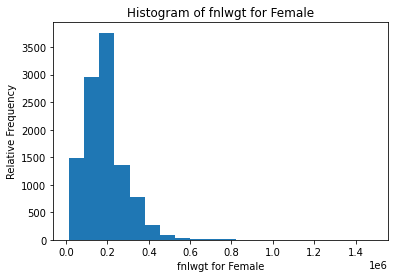

In [ ]:
plt.hist(income94[income94.sex == " Female"].fnlwgt, bins = 20)
plt.title('Histogram of fnlwgt for Female')
plt.xlabel('fnlwgt for Female')
plt.ylabel('Relative Frequency')
plt.show()

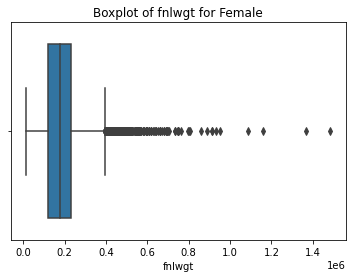

In [ ]:
# Generate boxplot
import seaborn as sns

sns.boxplot(x = 'fnlwgt', data = income94[income94.sex == " Female"])
plt.xlabel('fnlwgt')
plt.title('Boxplot of fnlwgt for Female')
plt.show()

In [ ]:
# this function is copied from lab 2 of JSC270
def get_outliers(num_var, df):
  '''Get outliers based on the 1.5*IQR rule.
  Input - num_var: A string representing the v
  variable of interest
  df: The pd df containing the numerical data
  Output: A pd df containing the outlier obs
  '''
  # Capture 1st and 3rd quartiles
  firstquart = df[num_var].quantile(q=0.25)
  thirdquart = df[num_var].quantile(q=0.75)

  # Generate IQR
  iqr = thirdquart - firstquart

  # Generate the boundary for an outlier (ie. the whiskers of the plot)
  lower_whisker = firstquart - 1.5*iqr
  upper_whisker = thirdquart + 1.5*iqr

  # Gen outlier df
  outliers = df[(df[num_var] > upper_whisker) | (df[num_var] < lower_whisker)]
  print('The variable {} has {} outliers'.format(num_var, len(outliers)))
  return outliers

In [ ]:
get_outliers('fnlwgt', income94[income94.sex == " Male"])

The variable fnlwgt has 617 outliers


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
40,31,Private,507875,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,43,United-States,<=50K
80,18,Private,446839,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,0,0,30,United-States,<=50K
110,24,Private,432376,Bachelors,13,Never-married,Sales,Other-relative,White,Male,0,0,40,United-States,<=50K
157,71,Self-emp-not-inc,494223,Some-college,10,Separated,Sales,Unmarried,Black,Male,0,1816,2,United-States,<=50K
173,27,Private,428030,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32208,53,Private,539864,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,20,United-States,<=50K
32272,38,Private,447346,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,36,United-States,>50K
32306,24,Private,427686,1st-4th,2,Married-civ-spouse,Handlers-cleaners,Other-relative,White,Male,0,0,40,Mexico,<=50K
32329,28,Private,435842,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K


In [ ]:
get_outliers('fnlwgt', income94[income94.sex == " Female"])

The variable fnlwgt has 378 outliers


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group
37,19,Private,544091,HS-grad,9,Married-AF-spouse,Adm-clerical,Wife,White,Female,0,0,25,United-States,<=50K
89,43,Federal-gov,410867,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K
200,26,Private,397317,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,1876,40,United-States,<=50K
312,19,NaN,860348,Some-college,10,Never-married,NaN,Own-child,Black,Female,0,0,25,United-States,<=50K
317,22,Private,399087,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Other-relative,White,Female,0,0,40,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32194,42,State-gov,455553,HS-grad,9,Never-married,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K
32205,19,Private,693066,12th,8,Never-married,Other-service,Own-child,White,Female,0,0,15,United-States,<=50K
32286,28,Private,478315,Bachelors,13,Never-married,Prof-specialty,Own-child,Black,Female,0,0,40,United-States,<=50K
32470,50,Private,485710,Doctorate,16,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K


Correlation
1. 
a. 

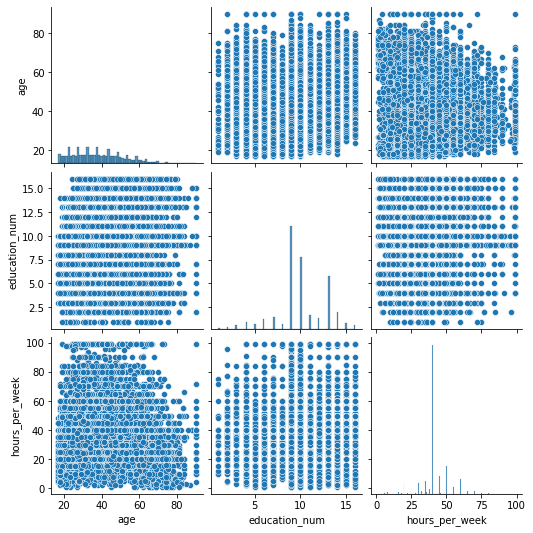

In [ ]:
sns.pairplot(income94[['age', 'education_num', 'hours_per_week']])
plt.show()

In [ ]:
income94[['age', 'education_num', 'hours_per_week']].corr()

,age,education_num,hours_per_week
age,1.000000,0.036527,0.068756
education_num,0.036527,1.000000,0.148123
hours_per_week,0.068756,0.148123,1.000000


In [ ]:
from pandas._config import reset_option
import scipy
r,p = scipy.stats.pearsonr(income94["education_num"], income94["hours_per_week"])


In [ ]:
r

0.1481227326229122

In [ ]:
p

4.2366474790836004e-159

c. 

In [ ]:
income94_male = income94[income94.sex == " Male"]
income94_female = income94[income94.sex == " Female"]

In [ ]:
income94_male[['age', 'education_num']].corr()

,age,education_num
age,1.000000,0.060486
education_num,0.060486,1.000000


In [ ]:
r1, p1 = scipy.stats.pearsonr(income94_male["education_num"], income94_male["age"])
r1

0.060486409198268254

In [ ]:
p1

4.0229868301718123e-19

In [ ]:
income94_female[['age', 'education_num']].corr()

,age,education_num
age,1.000000,-0.017899
education_num,-0.017899,1.000000


In [ ]:
r2, p2 = scipy.stats.pearsonr(income94_female["education_num"], income94_female["age"])
r2

-0.017899243935447704

In [ ]:
p2

0.06322895030804963

In [ ]:
income94[['age', 'education_num']].corr()

,age,education_num
age,1.000000,0.036527
education_num,0.036527,1.000000


In [ ]:
r3, p3 = scipy.stats.pearsonr(income94["education_num"], income94["age"])
r3

0.03652718946410611

In [ ]:
p3

4.305718002102917e-11

d. 

In [ ]:
x = np.array([-2.1, -1, 4.3])
y = np.array([3, 1.1, 0.12])
X = np.stack((x, y), axis=0)
np.cov(x, y)

array([[11.71      , -4.286     ],
       [-4.286     ,  2.14413333]])

In [ ]:
np.cov(X)

array([[11.71      , -4.286     ],
       [-4.286     ,  2.14413333]])

In [ ]:
np.cov(income94.education_num, income94.hours_per_week)

array([[  6.61888991,   4.70533794],
       [  4.70533794, 152.45899505]])

Regression
1. 
a. 

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

In [ ]:
a = np.where(income94["sex"] == " Female", 1, 0)
income94["sex_code"] = a

In [ ]:
reg1 = smf.ols('hours_per_week ~ sex_code', data = income94).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:31:11   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.4281      0.081    521.109      0.0

b.

In [ ]:
reg2 = smf.ols('hours_per_week ~ sex_code + education_num', data = income94).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:31:11   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        35.3815      0.271    130.613

c. 



In [ ]:
b = np.where(income94["gross_income_group"] == " <=50K", 0, 1)
income94["grs_inc_grp_bi"] = b

In [ ]:
reg3 = smf.ols('hours_per_week ~ sex_code + education_num + grs_inc_grp_bi', data = income94).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:31:11   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         36.5228      0.271    134.

In [ ]:
income94.gross_income_group

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: gross_income_group, Length: 32561, dtype: object

Part III

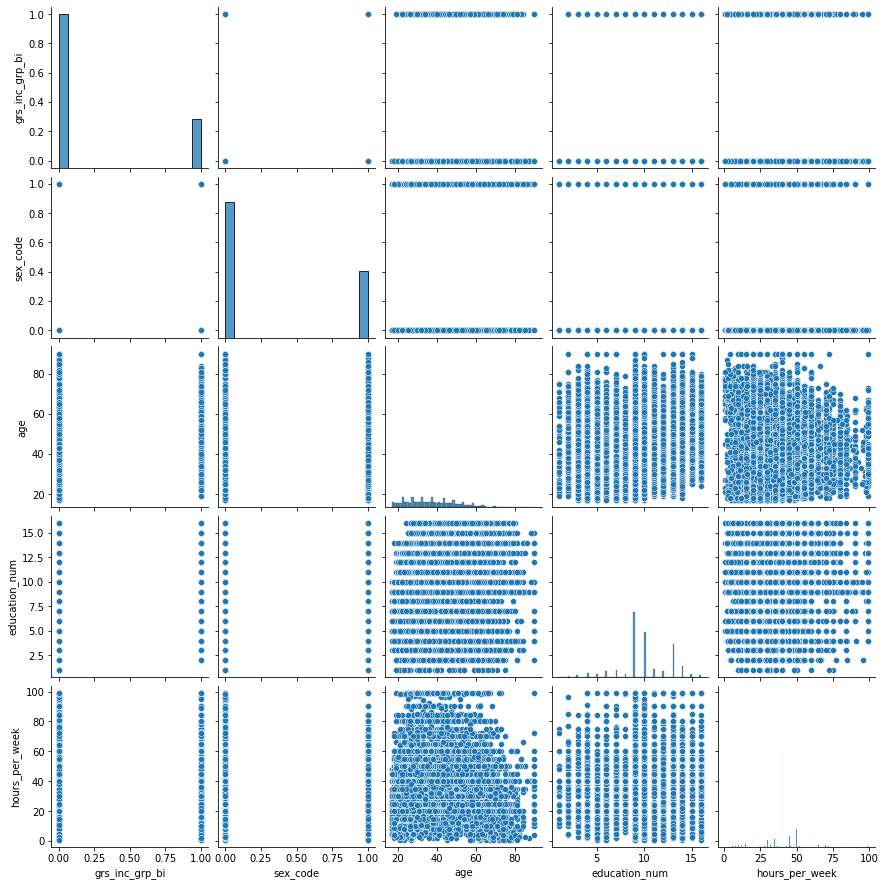

In [ ]:
sns.pairplot(income94[['grs_inc_grp_bi', 'sex_code', 'age', 'education_num', 'hours_per_week']])
plt.show()

In [ ]:
income94[['grs_inc_grp_bi', 'sex_code', 'age', 'education_num', 'hours_per_week']].corr()

,grs_inc_grp_bi,sex_code,age,education_num,hours_per_week
grs_inc_grp_bi,1.000000,-0.215980,0.234037,0.335154,0.229689
sex_code,-0.215980,1.000000,-0.088832,-0.012280,-0.229309
age,0.234037,-0.088832,1.000000,0.036527,0.068756
education_num,0.335154,-0.012280,0.036527,1.000000,0.148123
hours_per_week,0.229689,-0.229309,0.068756,0.148123,1.000000


In [ ]:
reg_part3 = smf.ols('grs_inc_grp_bi ~ sex_code + age + education_num + hours_per_week', data = income94).fit()
print(reg_part3.summary())

                            OLS Regression Results                            
Dep. Variable:         grs_inc_grp_bi   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     2232.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:31:38   Log-Likelihood:                -14592.
No. Observations:               32561   AIC:                         2.919e+04
Df Residuals:                   32556   BIC:                         2.924e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.6499      0.012    -54.